Jin Jeon

HCDE 530 Computational Concepts<br>
Project 2B


## Google Cloud API and Textual Data Analysis

### Introduction

#### Using Natural Language API : 
**Google Cloud Platform** is a suite of cloud computing services that lets developers interact with APIs that involve data storage, data analytics, and machine learning. In this notebook, I build on to the previous notebook to call in the spreadsheets from Google Drive, and run textual data analysis using the Cloud Natural Language API and vector space models. 

**[Natural Language AI](https://cloud.google.com/natural-language)** is an API available in Google Cloud. It uses machine learning to analyze texts through sentiment analysis and extract information about the text itself. It offers three types of models: 

1. **Auto ML**: that allows you to train your own model
2. **<mark>Natural Language API</mark>**: that offers pre-trained models to quickly boot up NLP. 
3. **Healthcare Natural Language AI**: that is specific for medical texts. 

For the sake of time scope and complexity of the project, let's use the Natural Language API to call in a pre-trained model to analyze textual data. The demo of the model can be found online here: https://cloud.google.com/natural-language.


#### Goal of this notebook: 

Survey studies are essential for understanding the users because they can be quickly developed and sent out to receive a good amount of sample in a short period of time. Surveys are powerful to be utilized for conducting initial research at a discovery stage to explore the general problem space and user behaviors. 

One of the free and efficient tools is the Google Forms. With GoogleSheets API, we are able to access and manipulate incoming or completed data through code. Furthermore, we can easily shape and analyze data through Python. 

While Google Form is capable of generating pie graphs and bar graphs to summarize the survey results, the visualizations are often rudimentary or basic. Using Python, we can easily handle large sets of data and breakdown and analyze the data by each demographic group, and probe for any interesting results.

**Specifically, let's see if there are any significant differences or responses that are made for each age group and gender.**

** _**Disclaimer:** Some of the code is an extension from my previous notebooks._

## Looking at Natural Language API

**Before diving straight to working with data, let's take a look at some of the features of NL API.**

#### Setup:
For setup, refer to the [Natural Language quickstart guide](https://cloud.google.com/natural-language/docs/setup). Once we have the account and credentials setup, correct pip packages installed, and API enabled, we can write codes to call in the API locally. To run the API locally, let's first import the right packages from `google.cloud` and direct Python where to look for credentials. The NL API service credential should be located in the correct directory as stated below in the code.

### Code Implementation

In [1]:
# Imports the Google Cloud client library
import os
from google.cloud import language_v1

# set environment for credentials (need to be called with every start of instance)
# refer the reference tab for setting credentials
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/Jin/google-cloud-sdk/natural-language-api.json"

# Instantiates a client
client = language_v1.LanguageServiceClient()

# Available types: PLAIN_TEXT, HTML
type_ = language_v1.Document.Type.PLAIN_TEXT

encoding_type = language_v1.EncodingType.UTF8

## Natural Language API Features 

For the scope of this project, let's look at some specific methods that NL API offers. 

**1. Entity analysis**<br>
**2. Sentiment analysis**<br>
**3. Entity Sentiment analysis**

### 1. Entity analysis
`analyze_entities`: inspects the given text for known entities (proper nouns such as public figures, landmarks, etc.), and returns information about those entities.

In [2]:
# grab a random text from wikipedia
text = u"The University of Washington is a public research university in Seattle, Washington.\
        Ana Mari Cauce is the president."

document = {"content": text, "type_": type_}

response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})

# Loop through entitites returned from the API
for entity in response.entities:
    print(u"Entity name: {}".format(entity.name))

    # Get entity type, e.g. PERSON, LOCATION, ADDRESS, NUMBER, et al
    print(u"Entity type: {}".format(language_v1.Entity.Type(entity.type_).name))

    # Get the salience score associated with the entity in the [0, 1.0] range
    print(u"Salience score: {}".format(entity.salience) + '\n')

Entity name: University of Washington
Entity type: ORGANIZATION
Salience score: 0.7374827265739441

Entity name: Ana Mari Cauce
Entity type: PERSON
Salience score: 0.11040862649679184

Entity name: Washington
Entity type: LOCATION
Salience score: 0.07763731479644775

Entity name: Seattle
Entity type: LOCATION
Salience score: 0.07447130978107452



### 2. Sentiment analysis
`analyze_sentiment`: inspects the given text and identifies the prevailing emotional opinion within the text, especially to determine a writer's attitude as positive, negative, or neutral.

In [3]:
def analyze_sentiment(text):
    """
    a simple function created to run sentiment analysis for a given text.

    Parameters
    ----------
    text : str
        string of text to be analyzed

    Returns
    -------
    sentiment.score: float 
        sentiment score between -1.0 (negative sentiment) and 1.0 (positive sentiment).
        
    sentiment.magnitude: float
        a non-negative number in the [0, +inf) range, which represents the absolute \
        magnitude of sentiment regardless of score (positive or negative).
    """
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)

    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

    print("Text: {}".format(text))
    print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))
    
    return sentiment.score, sentiment.magnitude

Let's try feeding in some random sentences and see how sentiments come out. 

In [4]:
# The text to analyze
text = u"The dish was delightfully surprising."
text2 = u"The overall experience was terrible."

analyze_sentiment(text)
print('\n')
_, _ = analyze_sentiment(text2)

Text: The dish was delightfully surprising.
Sentiment: 0.8999999761581421, 0.8999999761581421


Text: The overall experience was terrible.
Sentiment: -0.800000011920929, 0.800000011920929


### 3. Entity sentiment analysis
`analyze_entity_sentiment`: combines both entity analysis and sentiment analysis and attempts to determine the sentiment (positive or negative) expressed about entities within the text.

In [5]:
def analyze_entity_sentiment(text):
    """
    a simple function to run entity sentiment analysis for a given text.

    Parameters
    ----------
    text : str
        string of text to be analyzed

    Returns
    -------
    entity.name: str
        name of the entity identified 
        
    entity.type.name: str
        type of the entity identified
        
    sentiment.score: float 
        sentiment score between -1.0 (negative sentiment) and 1.0 (positive sentiment).
        
    sentiment.magnitude: float
        a non-negative number in the [0, +inf) range, which represents the absolute \
        magnitude of sentiment regardless of score (positive or negative).
    """
    document = {"content": text, "type_": type_}

    encoding_type = language_v1.EncodingType.UTF8

    response = client.analyze_entity_sentiment(request = {'document': document, 'encoding_type': encoding_type})
    # Loop through entitites returned from the API
    for entity in response.entities:
        print(u"Entity name: {}".format(entity.name))

        # Get entity type, e.g. PERSON, LOCATION, ADDRESS, NUMBER, et al
        print(u"Entity type: {}".format(language_v1.Entity.Type(entity.type_).name))

        # Get the salience score associated with the entity in the [0, 1.0] range
        print(u"Salience score: {}".format(entity.salience))

        # Get the aggregate sentiment expressed for this entity in the provided document.
        sentiment = entity.sentiment
        print(u"Entity sentiment score: {}".format(sentiment.score))
        print(u"Entity sentiment magnitude: {}".format(sentiment.magnitude))
        print('\n')
        
    return entity.name, language_v1.Entity.Type(entity.type_).name, sentiment.score, sentiment.magnitude

Let's try feeding in one neutral sentence, and a positive sentence.

In [6]:
text = u"The University of Washington is a public research university in Seattle, Washington.\
        The HCDE Department offers amazing opportunities to study UX and HCI."

_, _, _, _ = analyze_entity_sentiment(text)

Entity name: University of Washington
Entity type: ORGANIZATION
Salience score: 0.7403186559677124
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0


Entity name: Washington
Entity type: LOCATION
Salience score: 0.07140954583883286
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0


Entity name: Seattle
Entity type: LOCATION
Salience score: 0.06301160156726837
Entity sentiment score: 0.0
Entity sentiment magnitude: 0.0


Entity name: HCDE Department
Entity type: ORGANIZATION
Salience score: 0.04862694814801216
Entity sentiment score: 0.8999999761581421
Entity sentiment magnitude: 0.8999999761581421


Entity name: UX
Entity type: OTHER
Salience score: 0.03587672486901283
Entity sentiment score: 0.699999988079071
Entity sentiment magnitude: 0.699999988079071


Entity name: HCI
Entity type: OTHER
Salience score: 0.025248046964406967
Entity sentiment score: 0.800000011920929
Entity sentiment magnitude: 0.800000011920929


Entity name: opportunities
Entity type: OTHER
S

From the result above, we can see that the first sentiment of the entities identified in the first sentence, such as 'University of Washington' or 'Seattle' has a sentiment score of 0.0 which means neutral. This makes sense because the sentence was directly pulled from Wikipedia. On the other hand, the second sentence I wrote highlights 'HCDE Department' as an entity with positive sentiment score of 0.8999. 

#### So what's next?
We can interchangeably use the two functions defined `analyze_sentiment` and `analyze_entity_sentiment` to identify the overall sentiment of a given text or entity if specified in the data analysis process. 

## Loading in data using Google Sheets API

From the previous notebook, we were able to call in Google sheets from the web directly to this code. The following code will only run if you have your Google `credential.json` and `token.json` within the working directory. 

In [7]:
from __future__ import print_function
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials

SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']
SPREADSHEET_ID = '11Den6g5nuR4B2CCUML1KrA0bEZXRpPZ7t83Ieyi7NJ4'

# Specify which sheet or row/column of data to call in
# refer to https://developers.google.com/sheets/api/guides/concepts#a1_notation for detail
RANGE_NAME = 'health_data'

creds = Credentials.from_authorized_user_file('token.json', SCOPES)
service = build('sheets', 'v4', credentials=creds)

# Call the Sheets API to read in the data
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId = SPREADSHEET_ID,
                            range = RANGE_NAME).execute()
values = result.get('values', [])

# convert the sheet to pandas dataframe so we can easily manipulate the data
import pandas as pd

data = pd.DataFrame(values[1:], columns=values[0])

# let's confirm 
print(type(data))

data.shape

<class 'pandas.core.frame.DataFrame'>


(71, 27)

## Dataset
From the code above, we translated the data into pandas dataframe. Using `data.shape`, we know that there are total 27 questions collected from 71 participants. For simplicity, I remove any data that does not prefer to disclose gender. This brings the data size to 68. Due to the extensive length and branching logic within the survey, the data becomes more textual and qualitative for questions or columns in the back. I will primarily use selected columns that are of interest. 

Let's have a quick glance at the dataset. 

In [8]:
# for simplicity, let's constrain the gender option to only two
gender_options = ['Man', 'Woman']
data = data[data['What is your gender?'].isin(gender_options)]

print('There are total ' + str(len(data)) + ' participants.')
print('The survey consists of ' + str(data.shape[1]) + ' questions (columns in the dataframe).')

# convert the column string values to integers
data['How would you rate your health?'] = data['How would you rate your health?'].astype(int)

data.head(3)

There are total 69 participants.
The survey consists of 27 questions (columns in the dataframe).


,Timestamp,What age range are you?,What is your gender?,What actions do you take regarding your health?,How would you rate your health?,Have you ever tracked your health and/or fitness?,Why do you not track your health and/or fitness?,How do you generally like to keep track of activities?,Which of the following did you keep track of? (Select all that apply.),What did you use to record your health and/or fitness? (Select all that apply.),...,Which of the following do you keep track of? (Select all that apply.),What do you use to record your health and/or fitness? (Select all that apply.),"If you use any app or device, could you tell us which one(s)?",Why do you track your health and/or fitness?,Is there anything you like about your current health and/or fitness tracking method?,"In the last 30 days, how often have you tracked your health and/or fitness?",Who views your health and/or fitness information?,How is your health and/or fitness information being used?,"What, if anything, has been helpful about the information you tracked?",Is there anything that could be better about your current health and/or fitness tracking method?
0,2020/07/18 9:59:33 AM EST,Under 18,Man,Exercise;Learn more about your health (e.g. fr...,3,Yes and I am currently still tracking,,,,,...,"Exercise (e.g. Steps taken, Distance, Calories...",Mobile App,Google fit and Pixels,It's interesting to look back at the data I ha...,My mood tracking method is very useful for dis...,Everyday,Myself,It's only used by me. It simply interests me.,I have concluded that I am prone to mood swing...,It could be more extensive.
1,2020/07/18 10:15:07 AM EST,25 - 34,Man,Exercise,4,"Yes, I have tracked before but not in the last...",,,"Cardiovascular (e.g. Heart rate, Blood pressur...",Wearable;Mobile App,...,None,None,None,None,None,None,None,None,None,None
2,2020/07/18 10:32:24 AM EST,18 - 24,Man,None of the above,2,No,"I eat very little junk food, and am very thin....",To do lists and notes,None,None,...,None,None,None,None,None,None,None,None,None,None


## Data Analysis
Now that we have seen the general dataframe structure, let's explore probing the data for analysis. 

In [9]:
import os
import pandas as pd
from collections import Counter
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import warnings
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scipy
from tabulate import tabulate

warnings.simplefilter(action='ignore', category=FutureWarning)  # suppress any warning
sns.set_color_codes('pastel')  # set color

### Querying data
Before we play around with data, let's query out the data that are of interest. This way we can manipulate the data more effectively without having to call on the entire dataset `data` everytime. 

There are total 7 different age groups. 

In [10]:
# let's divde the data by gender first 
females = data.loc[data['What is your gender?'] == 'Woman']
males = data.loc[data['What is your gender?'] == 'Man']

# let's also create dataset divided by age group
age_under18 = data.loc[data['What age range are you?'] == 'Under 18']
age_18to24 = data.loc[data['What age range are you?'] == '18 - 24']
age_25to34 = data.loc[data['What age range are you?'] == '25 - 34']
age_35to44 = data.loc[data['What age range are you?'] == '35 - 44']
age_45to54 = data.loc[data['What age range are you?'] == '45 - 54']
age_55to64 = data.loc[data['What age range are you?'] == '55 - 64']
age_over65 = data.loc[data['What age range are you?'] == '65 or older']

In [11]:
print(len(males))
print(len(females))

31
38


## Research Question: How does self-perception of health rating differ by gender and age?

Participants were asked, How would you rate your health? (5 being healthy, 1 being not healthy).

### A. Health rating by gender
Let's breakdown the data to see how self-perception of health wellness varies by gender and different age groups. In the code below, I first quary females and males from the data.

In [12]:
# columns[4] is the column for health rating
mean_males = np.mean(males[males.columns[4]])
mean_females = np.mean(females[females.columns[4]])

print("Mean of males' self-health wellness: " + str(mean_males))
print("Mean of females' self-health wellness: " + str(mean_females))

Mean of males' self-health wellness: 3.5161290322580645
Mean of females' self-health wellness: 3.4473684210526314


### B. Health rating by age group

Now let's breakdown the data to see how self-perception of health wellness varies by different age groups.

In [13]:
age = data.groupby('What age range are you?')['How would you rate your health?'].mean()
age

What age range are you?
18 - 24        3.615385
25 - 34        3.285714
35 - 44        3.500000
45 - 54        3.375000
55 - 64        3.600000
65 or older    4.000000
Under 18       3.000000
Name: How would you rate your health?, dtype: float64

**Conversely, the age group 65 or older actually has the highest self-perception of wellness. The youngest group (age under 18) rated the lowest.**

### C. T-test for statistical signifcance
**However, with small samples of the two demographic groups `65 or older` and `Under 18`, we are not sure if the difference we see here is significant. Let's run a quick t-test to see if the difference we are seeing is statistically significant.** 

In [14]:
t, p = scipy.stats.ttest_ind(age_over65['How would you rate your health?'], age_under18['How would you rate your health?'])

print('t: ' + str(t.round(4)))  
print('p: ' + str(p.round(4)))  # the p-val should be less than 0.05 in general to assume the difference we observe is signifcant

t: 2.8983
p: 0.0199


We see the p-value is 0.01 which is signifcant, which is one interesting find! So we can say that within this dataset, the people age over 65 perceive themselves to be more healthy than teenagers would do. 

### D. Health rating by age & gender group

Now let's breakdown by both gender and different age groups to look at how the self perception of health wellness change.

In [15]:
age_gender = data.groupby(['What age range are you?', 'What is your gender?'])['How would you rate your health?'].mean().round(2)

age_gender

What age range are you?  What is your gender?
18 - 24                  Man                     3.43
                         Woman                   3.83
25 - 34                  Man                     3.43
                         Woman                   3.21
35 - 44                  Man                     3.80
                         Woman                   3.29
45 - 54                  Man                     3.40
                         Woman                   3.33
55 - 64                  Man                     3.33
                         Woman                   4.00
65 or older              Man                     4.00
                         Woman                   4.00
Under 18                 Man                     3.00
                         Woman                   3.00
Name: How would you rate your health?, dtype: float64

### E. Iteratively running t-test within each age group
We have several different age groups with each male and female gender group. Within each age group, let's run a t-test to see if there are any significant observed differences. 

In [16]:
gender_options = ['Man', 'Woman']
age_groups = ['age_under18', 'age_18to24', 'age_25to34', 'age_35to44', 'age_45to54', 'age_55to64', 'age_over65']

table = []
table.append(['age group', 't value', 'p value'])

# iteratively run for t-tests within each age group defined in the list variable 'age_groups'
for i in range(0, len(age_groups)):
    data_string = "['How would you rate your health?']"
    eval_string1 = age_groups[i] + '.loc[' + age_groups[i] + "['What is your gender?'] == 'Man']"
    a = eval(eval_string1 + data_string)
    eval_string2 = age_groups[i] + '.loc[' + age_groups[i] + "['What is your gender?'] == 'Woman']"
    b = eval(eval_string2 + data_string)
#     strings_combined = 'scipy.stats.ttest_ind(a, b)'

    t, p = eval('scipy.stats.ttest_ind(a, b)')
    
    # we use a package called tabulate to print out a formatted table
    table.append([age_groups[i], t.round(4) ,p.round(4)])

print(tabulate(table, headers='firstrow'))

age group      t value    p value
-----------  ---------  ---------
age_under18   nan        nan
age_18to24     -1.1315     0.2819
age_25to34      0.4504     0.6575
age_35to44      0.9682     0.3558
age_45to54      0.1637     0.8754
age_55to64     -0.7746     0.495
age_over65      0          1


/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/envs/py3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**We see that the p-values are all above 0.05 which means that there are no observed significant differences in gender within each age group.**

## Data Visualization

Let's first try plotting a simple visual violin plot. 

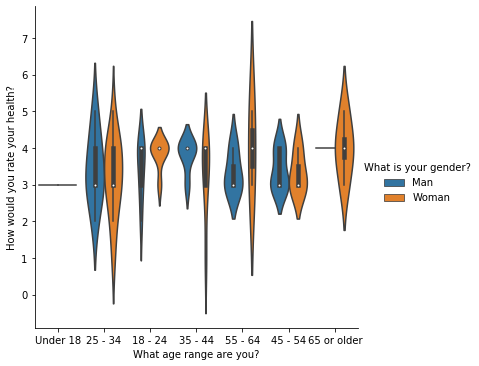

In [17]:
age_plot = sns.catplot(x='What age range are you?', y='How would you rate your health?', \
                       hue='What is your gender?', kind="violin", data=data);

## Characterizing textual data through wordcloud
Let's change focus and try analyzing textual inputs from the participants. We will analyze the column How is your health and/or fitness information being used? question to identify any emerging keywords using the word cloud representation. Disclaimer: The result here is not such a useful or accurate representation as the stopwords did not clearly filter out.

We first call in a list of stopwords to filter out any unnecessary words, such as 'I', 'and', and etc. We then flatten out all the responses into a single list of words.

### Is there gender difference in how they use health data (text responses)? 

Participants were asked, "How is your health and/or fitness information being used?" Here, I try to breakdown the text data through representation of wordcloud, and see if there any characteristics found in each gender. 

In [18]:
# builtin stopword sets from nltk 
stop = set(stopwords.words('english'))


def plot_wordcloud(df, col, separator=None): 
    """
    Plots a wordcloud of given dataframe and specific column. The text is counted at word level.
    
    Parameters
    ----------
    df: pandas dataframe
        dataframe that contains textual data
    col: int
        integer that points to the specific column with textual data 
    separator: str (default: None)
        string specified to breakdown the text by. Default is empty space
    
    Returns 
    -------
    Wordcloud plot 
    
    list of most common words in the dataframe
    
    """
    # filter out any NaNs
    response = [x for x in df[df.columns[col]] if x == x]
    # filter out any None
    response = [x for x in response if x != None]

    word_dict = []
    for i in range(0, len(response)):
        if separator == None:
            word_dict.append(response[i].split())
        else: 
            word_dict.append(response[i].split(separator))
    word_filtered = []

    # flatten the list and lower all letter cases
    for sublist in word_dict:
        for item in sublist:
            word_filtered.append(item.lower())

    # remove stopwords
    word_filtered = [x for x in word_filtered if x not in stop]

    word_filtered = [word.replace('.','').replace(',', '').replace("'",'') for word in word_filtered]
    
    # print most common words
    most_common_words = Counter(word_filtered).most_common(10)
    print(most_common_words)
    
    # plot wordcloud
    texts = " ".join(word for word in word_filtered)
    cloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts)
    plt.imshow(cloud, interpolation='bilinear')

[('me', 2), ('adjust', 2), ('overall', 2), ('personal', 2), ('im', 2), ('its', 1), ('used', 1), ('simply', 1), ('interests', 1), ('food', 1)]


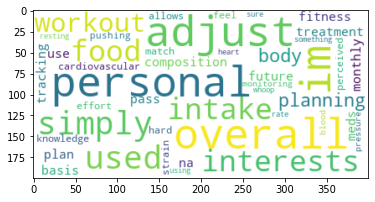

In [19]:
# plot wordcloud for Man
plot_wordcloud(males, 24)  # 24 specifies the column number

[('use', 4), ('see', 4), ('im', 4), ('bit', 3), ('more', 3), ('less', 3), ('food', 3), ('know', 3), ('sleep', 2), ('information', 2)]


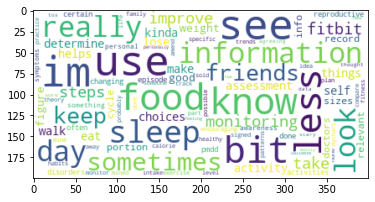

In [20]:
# plot wordcloud for Woman
plot_wordcloud(females, 24)

The top image is the wordcloud of male participants and the bottom is that of female participants. We see that some words are not as meaningful and that one critical fault to this approach is that breaking down the responses into word level can misrepresent the meaning of their responses. For example, 'exercise' and 'not exercise' have two opposing ideas but here, it would count 'not' and 'exercise' as two seperate ideas. 

Even though the word counts are small, we see more 'food' and 'sleep' for female participants, leading to an assumption that it could be related to going on diets. 

### Analyzing categorical data using wordcloud

Participants were also asked, "what actions do you take regarding your health?" with multiple choices answer selections that include...
1. 'exercise'
2. 'take medication or health supplements'
3. 'track health or fitness'
4. 'learn more about health'
5. 'receive regular treatment at clinic'
6. 'maintain a diet'
7. 'receive mental counseling.' 

[('exercise', 29), ('take medication and/or health supplements', 10), ('track your health and/or fitness', 9), ('learn more about your health (eg from online friends or community)', 8), ('maintain a diet', 8), ('receive regular treatment and/or consultation at clinic', 3), ('none of the above', 2)]


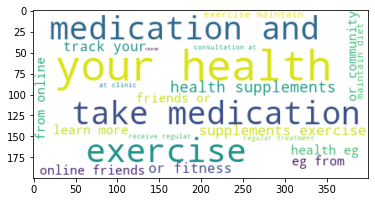

In [21]:
plot_wordcloud(males, 3, ';')

[('exercise', 30), ('take medication and/or health supplements', 27), ('track your health and/or fitness', 24), ('learn more about your health (eg from online friends or community)', 17), ('receive regular treatment and/or consultation at clinic', 17), ('maintain a diet', 16), ('receive mental counseling', 7)]


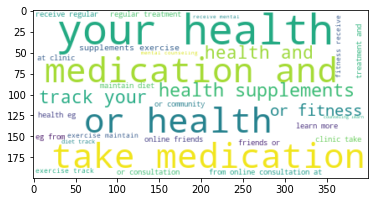

In [22]:
plot_wordcloud(females, 3, ';')

**From the two results above, we see that exercise is the most common practice for keeping up health in both genders. However, we see that in general, women tend to do more activities or attempts to maintain their health e.g. more frequently visits the clinic or receive counseling, whereas two men responded they simply do nothing at all.** 

## Conclusion & Thoughts
Wordcloud is a fun, engaging representation of textual data. However, more caution and consideration are needed because it can also tweak how the data is represented. For example, I coded the function so that it would breakdown any sentences or phrases into word level. This means that if someone does 'not exercise', it would still count 'exercise' and the end result would show 'exercise' being emphasized more. While the context of exercise is present, the meaning is totally the opposite.

### Future work
As much as I am interested in exploring textual data, I want to explore sentiment analysis and NLP models that could facilitate the analysis step of textual data. 

### References 

GoogleSheets API v4: https://developers.google.com/sheets/api/samples/reading

Google Oauth: https://developers.google.com/identity/protocols/oauth2/service-account#python

Google API Python Client: https://github.com/googleapis/google-api-python-client/blob/master/docs/oauth.md

Credentials: https://developers.google.com/workspace/guides/create-credentials
